<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios-superiores-de-occidente.png" width="150px" height="100px" /> 


&nbsp;
# Administración activa Vs Administración pasiva del capital
## Equipo B

***Emilio de la Torre***


***José Raúl Gallardo***


***Adrian Garcia*** 


La idea es replicar un ETF con posiciones en directo. Te han asignado la tarea de hacer un ejercicio simple de replicar la construcción de un portafolio de inversión y un criterio de rebalanceo lo más parecido a un ETF de ishares que tu selecciones. Esto con la finalidad de comparar los resultados de haber rebalanceado periódicamente el portafolio, ó, no haberlo hecho y continuar todo un año con las mismas posiciones.

## Limpieza y extracción de datos

### Importando librerías a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

### Importando los datos del ETF

In [2]:
#etf_file = 'IVEetf.xlsx' # Dirección del archivo que contiene información del etf
#data_etf = pd.read_excel(etf_file, sheet_name=0, header=0, sep=',', index_col=None, parse_dates=False, skip_blank_lines=True) 
# Importando los datos desde el excel
#data_etf.head()

Función para convertir datos string a float.

In [3]:
def s2f(to_convert):
    f = float(to_convert.replace(',',''))
    return f

Función para extraer información de los etfs (csv) y los tickers de cada uno.

In [4]:
def get_data(nFiles, file_title):
    df = []
    dr = np.arange(1,nFiles+1)
    df = [pd.read_csv(file_title+str(dr[i])+'.csv', header=1, index_col=None, parse_dates=False, skip_blank_lines=True, skiprows=9) for i in range(len(dr))]
    data = [df[i][(df[i]['Asset Class'] == 'Equity')] for i in range(len(df))]
    tickers = [list(data[i].iloc[:,0]) for i in range(len(data))]
    return data, tickers

In [10]:
data_etf, tickers = get_data(13, 'IVE_Holdings')

Función para sacar todos los tickers (valores únicos) de todos los archivos juntos.

In [5]:
def unique_tickers(tickers): 
    nFiles = len(tickers)
    ticker = []
    for i in range(nFiles):
        ticker = ticker + tickers[i]
    df = pd.DataFrame(ticker)
    unique_tickers = df.iloc[:,0].unique()
    return unique_tickers

In [11]:
all_tickers = unique_tickers(tickers)
len(all_tickers)

453

Función para extraer el número de acciones en circulación de los etf's de ishares.

In [6]:
def n_shares(nFiles, file_title):
    dr = np.arange(1,nFiles+1)
    df = [pd.read_csv(file_title+str(dr[i])+'.csv', index_col=None, parse_dates=False, skip_blank_lines=True, nrows=6) for i in range(len(dr))]
    all_shares = [df[i].iloc[3,0] for i in range(len(df))]
    all_shares_int = [int(float(all_shares[i].replace(',',''))) for i in range(len(all_shares))]
    return all_shares_int

In [9]:
etf_shares = n_shares(13, 'IVE_Holdings')

Función para extraer los precios de WIKI.

In [7]:
def get_quandl_prices(tickers):
    d_quandl = quandl.get_table('WIKI/PRICES', ticker = [all_tickers], qopts = {'columns': ['ticker', 'date', 'close']}, 
                        date = {'gte': '2017-03-01', 'lte': '2018-03-31'}, paginate=True)
    prices = d_quandl.set_index('date')
    prices = prices.pivot(columns='ticker')
    return prices

Función para filtrar los precios por fechas de interés.

In [8]:
def final_prices(df_number,initial_date,final_date):
    prices = quandl_prices[df_number][np.logical_and(quandl_prices[df_number].index >= np.datetime64(initial_date), 
                                            quandl_prices[0].index < np.datetime64(final_date))]
    return prices

### Extracción de precios de Quandl

In [12]:
import quandl
quandl.ApiConfig.api_key = "JyBxQPPNx_LTemwn-VbD" # Api para acceso a Quandl

Obteniendo acceso a los precios de Quandl/WikiPrices.

In [81]:
d_quandl = quandl.get_table('WIKI/PRICES', ticker = [all_tickers], qopts = {'columns': ['ticker', 'date', 'close']}, 
                        date = {'gte': '2017-03-01', 'lte': '2018-04-01'}, paginate=True)
d_quandl.head()

,ticker,date,close
None,,,
0,ZION,2018-03-27,52.02
1,ZION,2018-03-26,53.24
2,ZION,2018-03-23,51.23
3,ZION,2018-03-22,53.07
4,ZION,2018-03-21,55.10


A continuación se ordena el dataframe para tener los precios de los tickers en columnas

In [82]:
stock_prices = d_quandl.set_index('date')
stock_prices = stock_prices.pivot(columns='ticker')
stock_prices.head()

close                                                             \
ticker          A    AAL     AAP    ABC    ABT     ACN    ADM     ADS   ADSK   
date                                                                           
2017-03-01  52.04  47.09  156.68  92.23  45.59  124.07  46.51  247.62  88.93   
2017-03-02  51.38  45.72  157.36  91.94  45.69  124.35  45.48  243.94  87.32   
2017-03-03  51.98  46.82  155.35  92.23  45.25  123.64  45.20  244.63  85.32   
2017-03-06  51.25  45.31  154.25  89.99  45.13  123.24  44.76  245.45  82.94   
2017-03-07  51.21  44.84  151.99  88.48  45.00  124.14  44.46  245.05  82.07   

                   ...                                                    \
ticker        AEE  ...       XL   XLNX    XOM   XRAY   XRX    XYL   YHOO   
date               ...                                                     
2017-03-01  54.76  ...    41.12  59.68  83.02  64.50  7.39  49.55  46.24   
2017-03-02  55.12  ...    40.61  59.35  83.30  63.65  7.29  48.89  45.94   
2017-03-03  54.89  ...    40.36  58.74  82.46  63.36  7.36  48.73  45.91   
2017-03-06  54.89  ...    39.90  58.81  82.83  62.75  7.45  48.53  45.64   
2017-03-07  54.82  ...    40.13  58.75  82.52  62.55  7.36  48.78  45.73   

                                  
ticker        YUM     ZBH   ZION  
date                              
2017-03-01  65.57  118.89  46.53  
2017-03-02  65.21  118.02  44.96  
2017-03-03  65.03  118.28  45.36  
2017-03-06  64.50  117.22  45.33  
2017-03-07  64.02  117.07  45.28  

[5 rows x 450 columns]

Se elimina el multindex para poder manupular los datos mejor y se llenan los NaN con 0.

In [83]:
stock_prices.columns = stock_prices.columns.droplevel(0)
stock_prices = stock_prices.fillna(0)
stock_prices.head()

ticker,A,AAL,AAP,ABC,ABT,ACN,ADM,ADS,ADSK,AEE,...,XL,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2017-03-01,52.04,47.09,156.68,92.23,45.59,124.07,46.51,247.62,88.93,54.76,...,41.12,59.68,83.02,64.50,7.39,49.55,46.24,65.57,118.89,46.53
2017-03-02,51.38,45.72,157.36,91.94,45.69,124.35,45.48,243.94,87.32,55.12,...,40.61,59.35,83.30,63.65,7.29,48.89,45.94,65.21,118.02,44.96
2017-03-03,51.98,46.82,155.35,92.23,45.25,123.64,45.20,244.63,85.32,54.89,...,40.36,58.74,82.46,63.36,7.36,48.73,45.91,65.03,118.28,45.36
2017-03-06,51.25,45.31,154.25,89.99,45.13,123.24,44.76,245.45,82.94,54.89,...,39.90,58.81,82.83,62.75,7.45,48.53,45.64,64.50,117.22,45.33
2017-03-07,51.21,44.84,151.99,88.48,45.00,124.14,44.46,245.05,82.07,54.82,...,40.13,58.75,82.52,62.55,7.36,48.78,45.73,64.02,117.07,45.28


Para tener los pesos de las acciones presentes en Quandl es necesario hacer match entre los tickers del etf y los de la fuente de precios.

In [84]:
tickers_quandl = [stock_prices.columns[i] for i in range(len(stock_prices.columns))] #Extraemos los tickers de Quandl

In [85]:
df_w = pd.DataFrame(tickers_quandl, columns=['Ticker']) # Tickers se hacen un dataframe
# Se unen todos los datos de los dataframes con los tickers
all_df_etf = [df_w.set_index('Ticker').join(data_etf[i].set_index('Ticker'), on='Ticker') for i in range(len(data_etf))]
# Limpiando los dataframes para eliminar activos que no fueron necesarios en cada mes
final_etf_data = [all_df_etf[i].dropna() for i in range(len(all_df_etf))]

## ¿Cómo se calcula el NAV (Net Asset Value) de un ETF?

Se suma el valor total de cada uno de los instrumentos que componen el ETF, y se divide entre el numero de certificados que el ETF emitió. 

$$ NAV = \frac{\sum (Títulos\,de\,cada\,acción * precio)}{Acciones\,en\,circulación\,del\,etf}$$

In [86]:
# quandl_prices[0][np.logical_and(quandl_prices[0].index >= np.datetime64('2017-03'), quandl_prices[0].index < np.datetime64('2017-04'))]

### Cálculo del NAV 

#### NAV y rendimientos mensuales de los archivos de iShares

Se calculan los rendimientos mensuales del etf, tomando en cuenta el market value $(acciones*precio)$.

In [87]:
nav_mensual = [sum([s2f(final_etf_data[i].iloc[j,5]) for j in range(len(final_etf_data[i]))])/etf_shares[i] 
                      for i in range(len(final_etf_data))]

rend_etf_mensual = [((nav_mensual[i]/nav_mensual[i-1])-1) for i in (np.arange(1,len(nav_mensual)))]

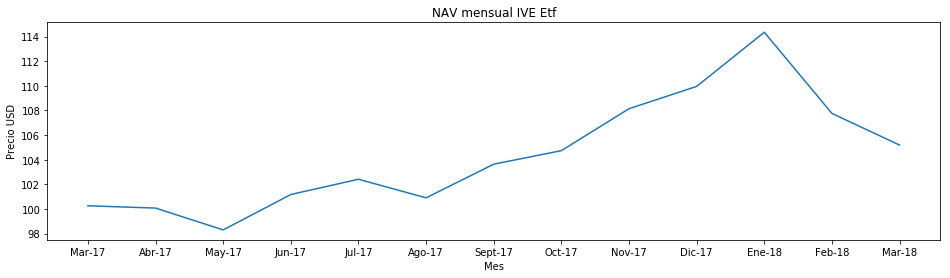

In [88]:
plt.figure(figsize=(16, 4))
plt.subplot(111)
plt.plot(nav_mensual) 
plt.xticks(np.arange(0, 13), ('Mar-17','Abr-17','May-17','Jun-17','Jul-17','Ago-17','Sept-17','Oct-17','Nov-17',
                              'Dic-17','Ene-18','Feb-18','Mar-18'))
plt.ylabel('Precio USD')
plt.xlabel('Mes') 
plt.title('NAV mensual IVE Etf')
plt.show()

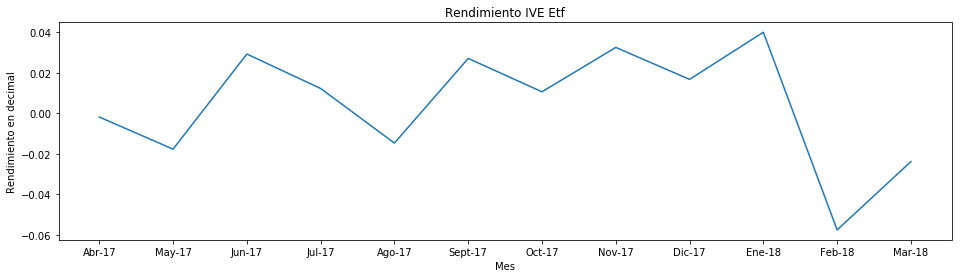

In [89]:
plt.figure(figsize=(16, 4))
plt.subplot(111)
plt.plot(rend_etf_mensual) 
plt.xticks(np.arange(0, 12), ('Abr-17','May-17','Jun-17','Jul-17','Ago-17','Sept-17','Oct-17','Nov-17','Dic-17',
                              'Ene-18','Feb-18','Mar-18'))
plt.ylabel('Rendimiento en decimal')
plt.xlabel('Mes') 
plt.title('Rendimiento IVE Etf')
plt.show()

#### Cálculo del NAV diario con distintos escenarios

Se analizan diferentes escenarios del etf:

 * No hay rebalanceos, el etf inicial es el que tendremos hasta fin de año, sólo se ve afectado por los precios.
 * Sí hay rebalanceos, se parte desde el mes inicial y posteriormente se hace un rebalanceo por año; así con los 12 meses:
     * Combinaciones: [1,2], [1,3], [1,4]...

Fechas a tomar en cuenta:

In [197]:
dates = ['2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12','2018-01',
         '2018-02','2018-03','2018-04']

Función para calcular el rendimiento mensual y la desviación estándar del etf por mes.

In [198]:
# La variable tickers_Nmes debe ser ingresada como una lista.
# La variable meses debe ser ingresada como una lista anidada, la principal deberá ser de la longitud de la variable tickers_Nmes
def nav_quandl(tickers_Nmes, meses):
    monthly_shares_df = []
    nav_diario = []
    desv_est = []
    rend_mensual = []
    etf_data = []
    shares_out = []
    for i in (tickers_Nmes):
        shares = [s2f(final_etf_data[i].iloc[j,4]) for j in range(len(final_etf_data[i].iloc[:,4]))]
        shares_df = pd.DataFrame(shares,columns=['shares'])
        monthly_shares_df.append(shares_df)
        etf_data.append(final_etf_data[i])
        shares_out.append(etf_shares[i])
    for i in range(len(tickers_Nmes)):
        for j in range(len(meses[i])-1):
            nav_diario = np.dot(stock_prices.loc[:,etf_data[i].index.values]
                                [np.logical_and(stock_prices.index >= np.datetime64(meses[i][j]),
                                                stock_prices.index < np.datetime64(meses[i][j+1]))],monthly_shares_df[i])/shares_out[i]
            desv_est.append(np.std(nav_diario))
            rend_mensual.append(((nav_diario[-1]/nav_diario[0])-1))
    return rend_mensual, desv_est

Obteniendo las combinaciones posibles.

In [218]:
rend = []
desv_std = []
for i in range(2,len(dates)):
    x,y = nav_quandl([1,i],[dates[:i],dates[i-1::]])
    rend.append(x)
    desv_std.append(y)

r1, s1 = nav_quandl([1],[dates])
rend.insert(0,r1)
desv_std.insert(0,s1)

## Medidas del desempeño

In [23]:
# Extrayendo tasa libre de riesgo de Estados Unidos
treasury = 'Treasury Yield.xlsx' # Archivo de tasas
start_date = '03-01-2017'
end_date = '04-01-2018'
t_yield = pd.read_excel(treasury, header = 0)
t_yield['Date'] = pd.to_datetime(t_yield['Date'])
t_y = t_yield[(t_yield['Date'] > start_date) & (t_yield['Date'] <= end_date)] # Filtrando datos de un año

In [24]:
month = ['04', '05', '06', '07','08','09','10','11','12']
month2 = ['01', '02', '03']
x = [t_yield['1 mo'][t_yield['Date'] == '01-'+str(month[i]+'-2017')] for i in range(len(month))]
x1 = [t_yield['1 mo'][t_yield['Date'] == '01-'+str(month2[i]+'-2018')] for i in range(len(month2))]

In [25]:
list(x)[0]

Series([], Name: 1 mo, dtype: float64)

## Notas

> Para los cálculos solo se están usando los activos de "Equity".

> En total tenemos 453 activos diferentes en el etf, quandl sólo permitió extraer 449.

> Las ponderaciones mensuales no van a dar 100%, debido a la ausencia de algunos activos.